<a href="https://colab.research.google.com/github/TheAI-Lady/30-seconds-of-code/blob/master/Dawnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
! nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-2081a1f8-74c3-8b08-b9b9-4e23bde76f75)


In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, SGD
from keras.utils import np_utils
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')


In [55]:
#Define learning rate
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 50:
        lrate = 0.0005
    elif epoch > 75:
        lrate = 0.0003        
    return lrate

In [56]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()



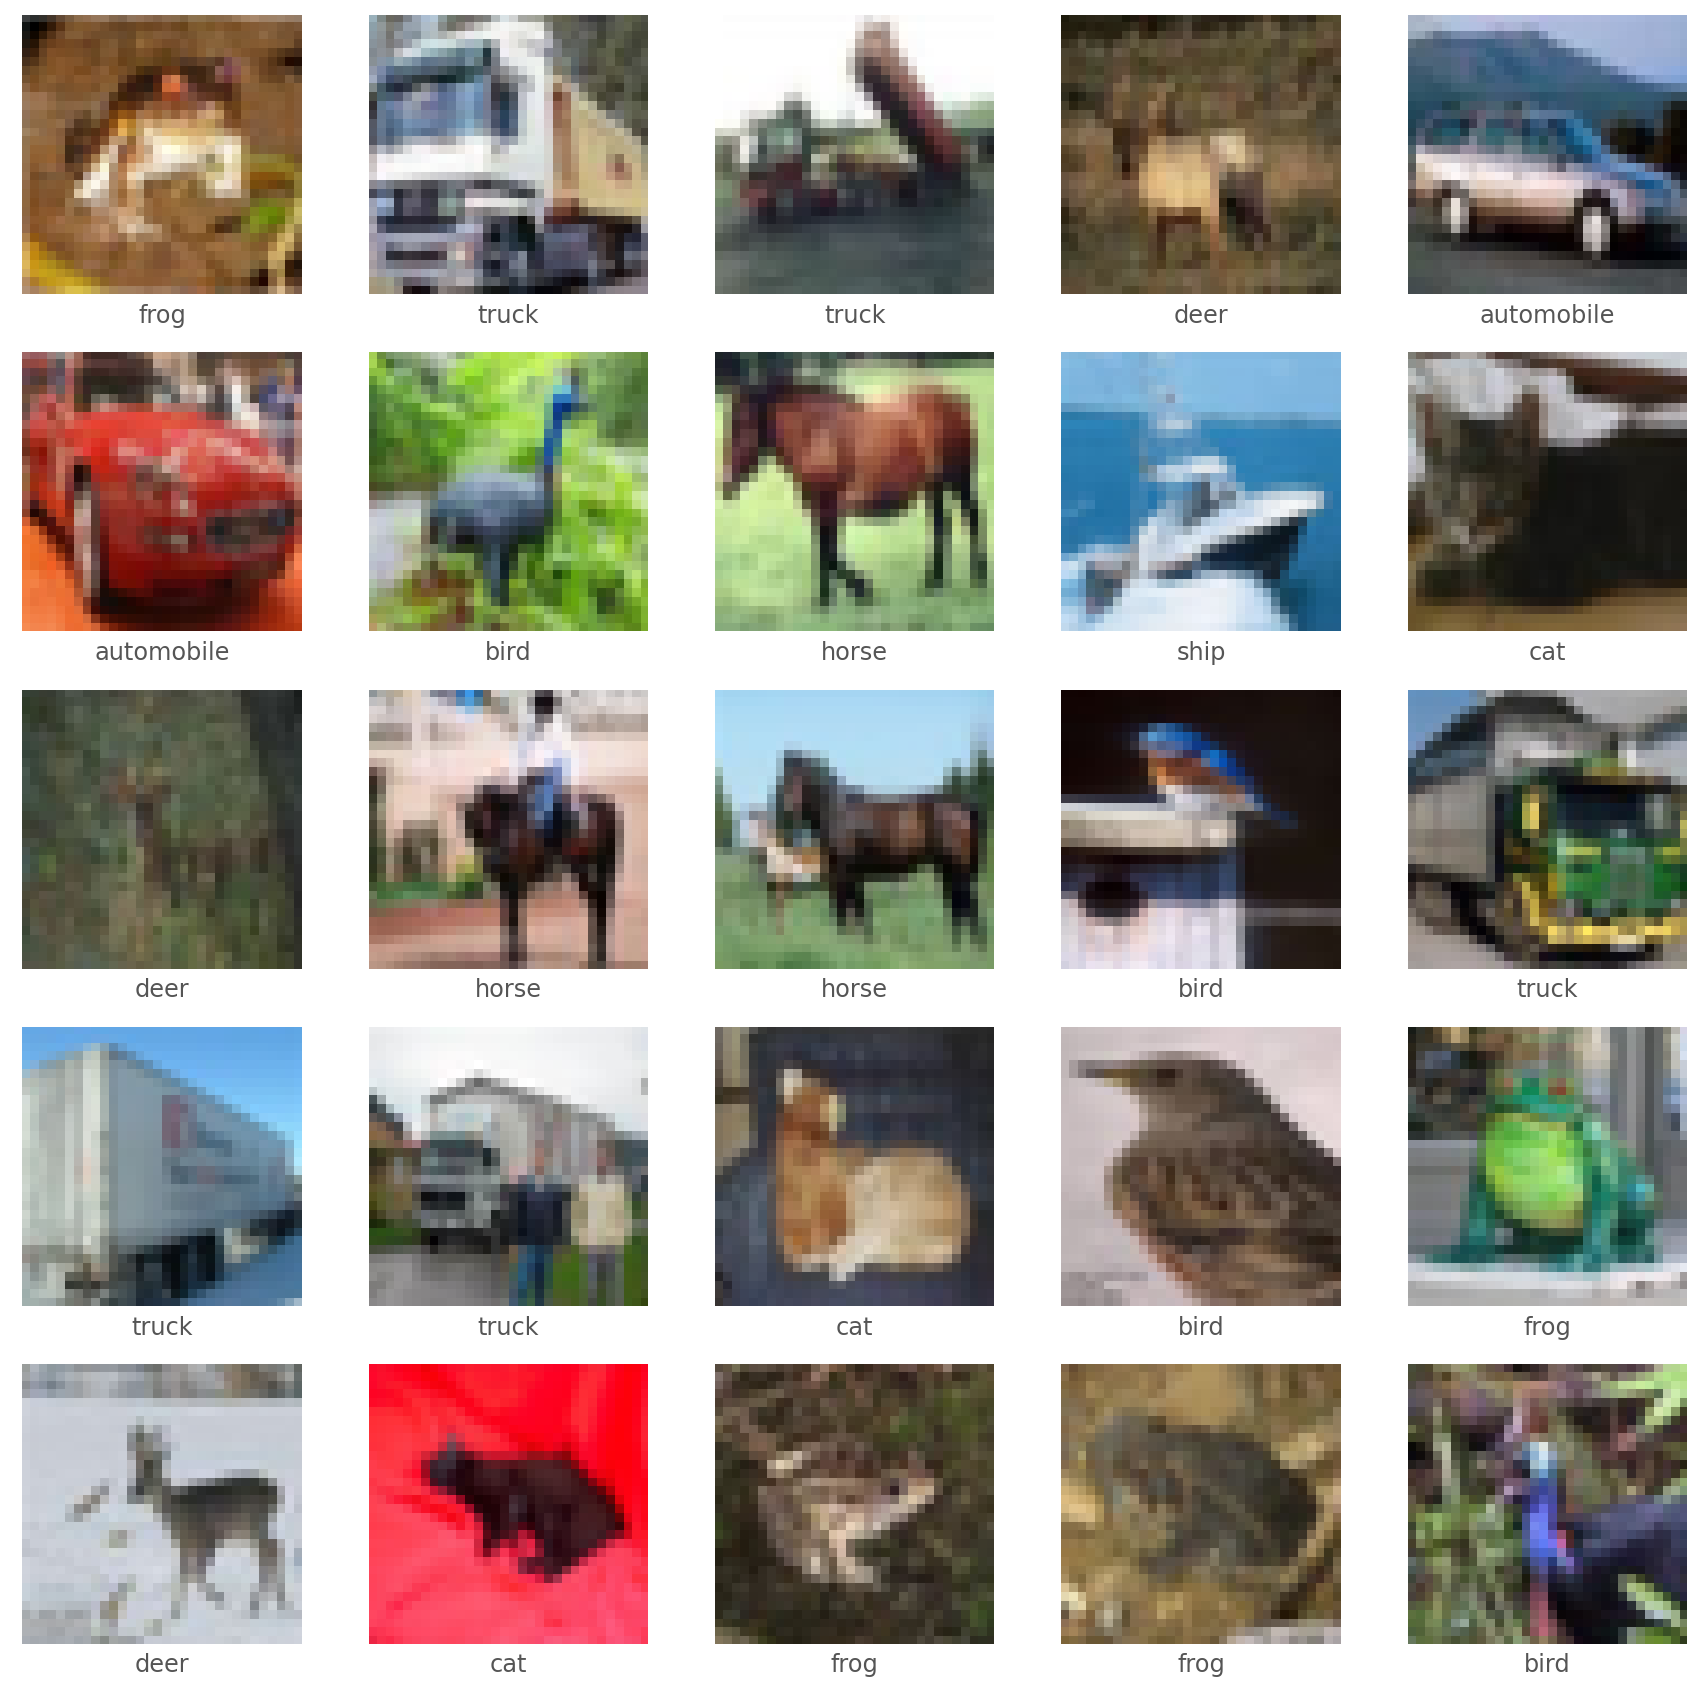

In [59]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [27]:
# Parse numbers as floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [28]:
# Normalize pixel values to be between 0 and 1
x_train /= 255.0
x_test /= 255.0

In [29]:
num_classes = 10
#convert array of labeled data to one-hot vector.
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)


In [30]:
#Create the model
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
#model.add(Activation('elu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.6))

model.add(Flatten())
#model.add(Dense(32, activation='elu'))
#model.add(Dropout(0.6))

model.add(Dense(num_classes, activation='softmax'))

#### Data preprocessing 

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 256)       7168      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 256)       0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 256)       1024      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 256)       590080    
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 256)       0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 256)       1024      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 256)      

In [33]:
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.4,
    )
datagen.fit(x_train)


In [35]:
#training
batch_size = 64
epoch_size = 100

#Compile model
keras.optimizers.RMSprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=epoch_size,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
781/781 [==============================] - 43s 52ms/step - loss: 2.1004 - accuracy: 0.2767 - val_loss: 1.5691 - val_accuracy: 0.4460
Epoch 2/100
781/781 [==============================] - 40s 52ms/step - loss: 1.6932 - accuracy: 0.4190 - val_loss: 2.4277 - val_accuracy: 0.3460
Epoch 3/100
781/781 [==============================] - 41s 52ms/step - loss: 1.5127 - accuracy: 0.5160 - val_loss: 1.2679 - val_accuracy: 0.6005
Epoch 4/100
131/781 [====>.........................] - ETA: 31s - loss: 1.4327 - accuracy: 0.5625

KeyboardInterrupt: ignored

In [14]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 256)       7168      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 256)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 256)       1024      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 256)       590080    
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 256)       1024      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 256)       0

In [15]:
#testing
scores = model.evaluate(x_test, y_test, verbose=1)
print('\nTest accuracy: %.3f Test loss: %.3f' % (scores[1]*100,scores[0]))


313/313 [==============================] - 3s 9ms/step - loss: 0.6593 - accuracy: 0.8749

Test accuracy: 87.490 Test loss: 0.659


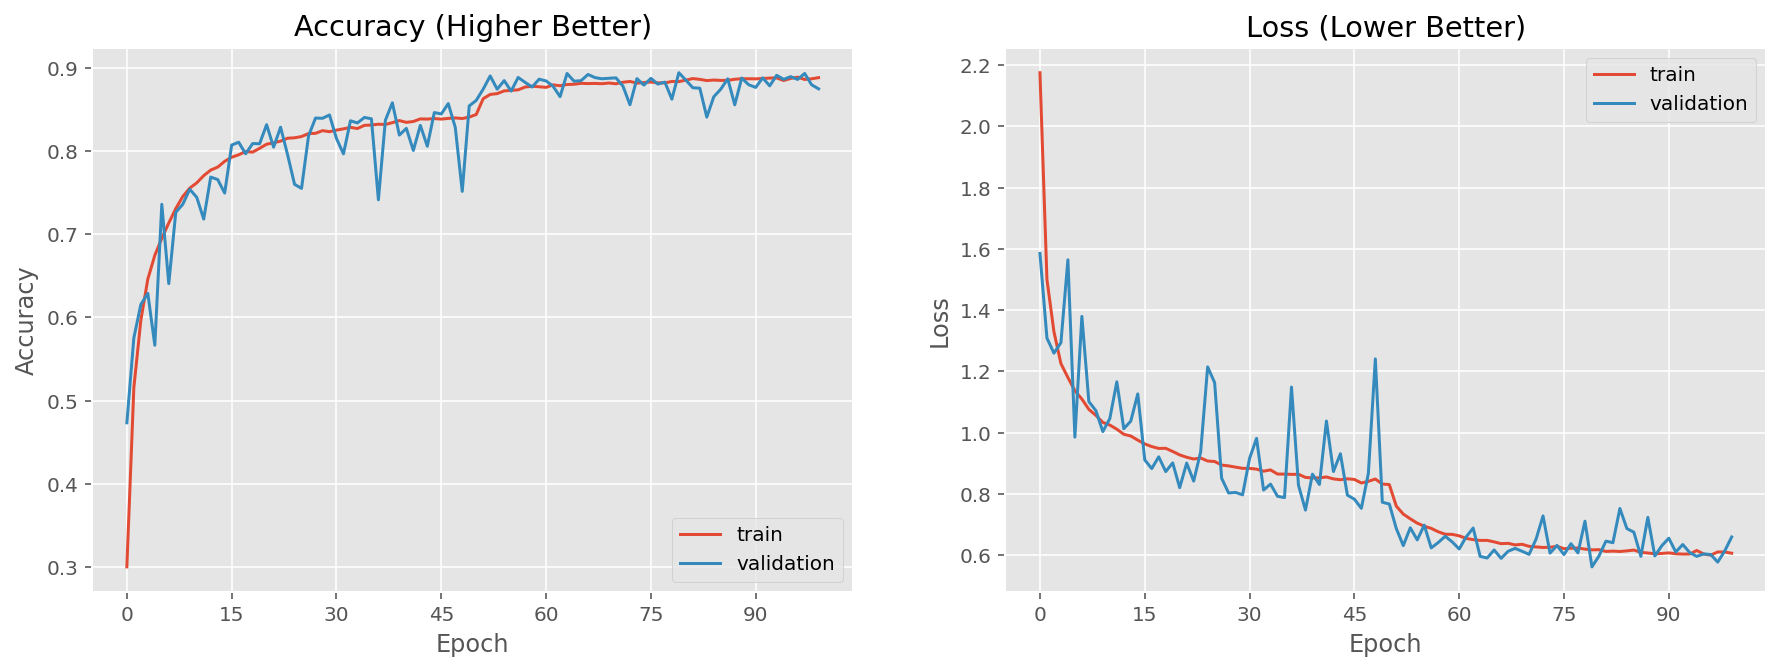

In [16]:

f, (plt1, plt2) = plt.subplots(1, 2,figsize=(15,5))

plt1.plot(history.history['accuracy'])
plt1.plot(history.history['val_accuracy'])
plt1.set_title('Accuracy (Higher Better)')
plt1.set(xlabel='Epoch', ylabel='Accuracy')
plt1.legend(['train', 'validation'], loc='lower right')
plt1.xaxis.set_major_locator(MaxNLocator(integer=True))

plt2.plot(history.history['loss'])
plt2.plot(history.history['val_loss'])
plt2.set_title('Loss (Lower Better)')
plt2.set(xlabel='Epoch', ylabel='Loss')
plt2.legend(['train', 'validation'], loc='upper right')
plt2.xaxis.set_major_locator(MaxNLocator(integer=True))


In [17]:
output = model.predict_classes(x_test)
print (output)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[3 8 8 ... 5 1 7]


In [39]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])
ind = np.where(np.equal(output, y_test)==0)

In [37]:
err_x = x_test[ind[0]]
err_y = output[ind[0]]
print (err_x.shape)

(1251, 32, 32, 3)


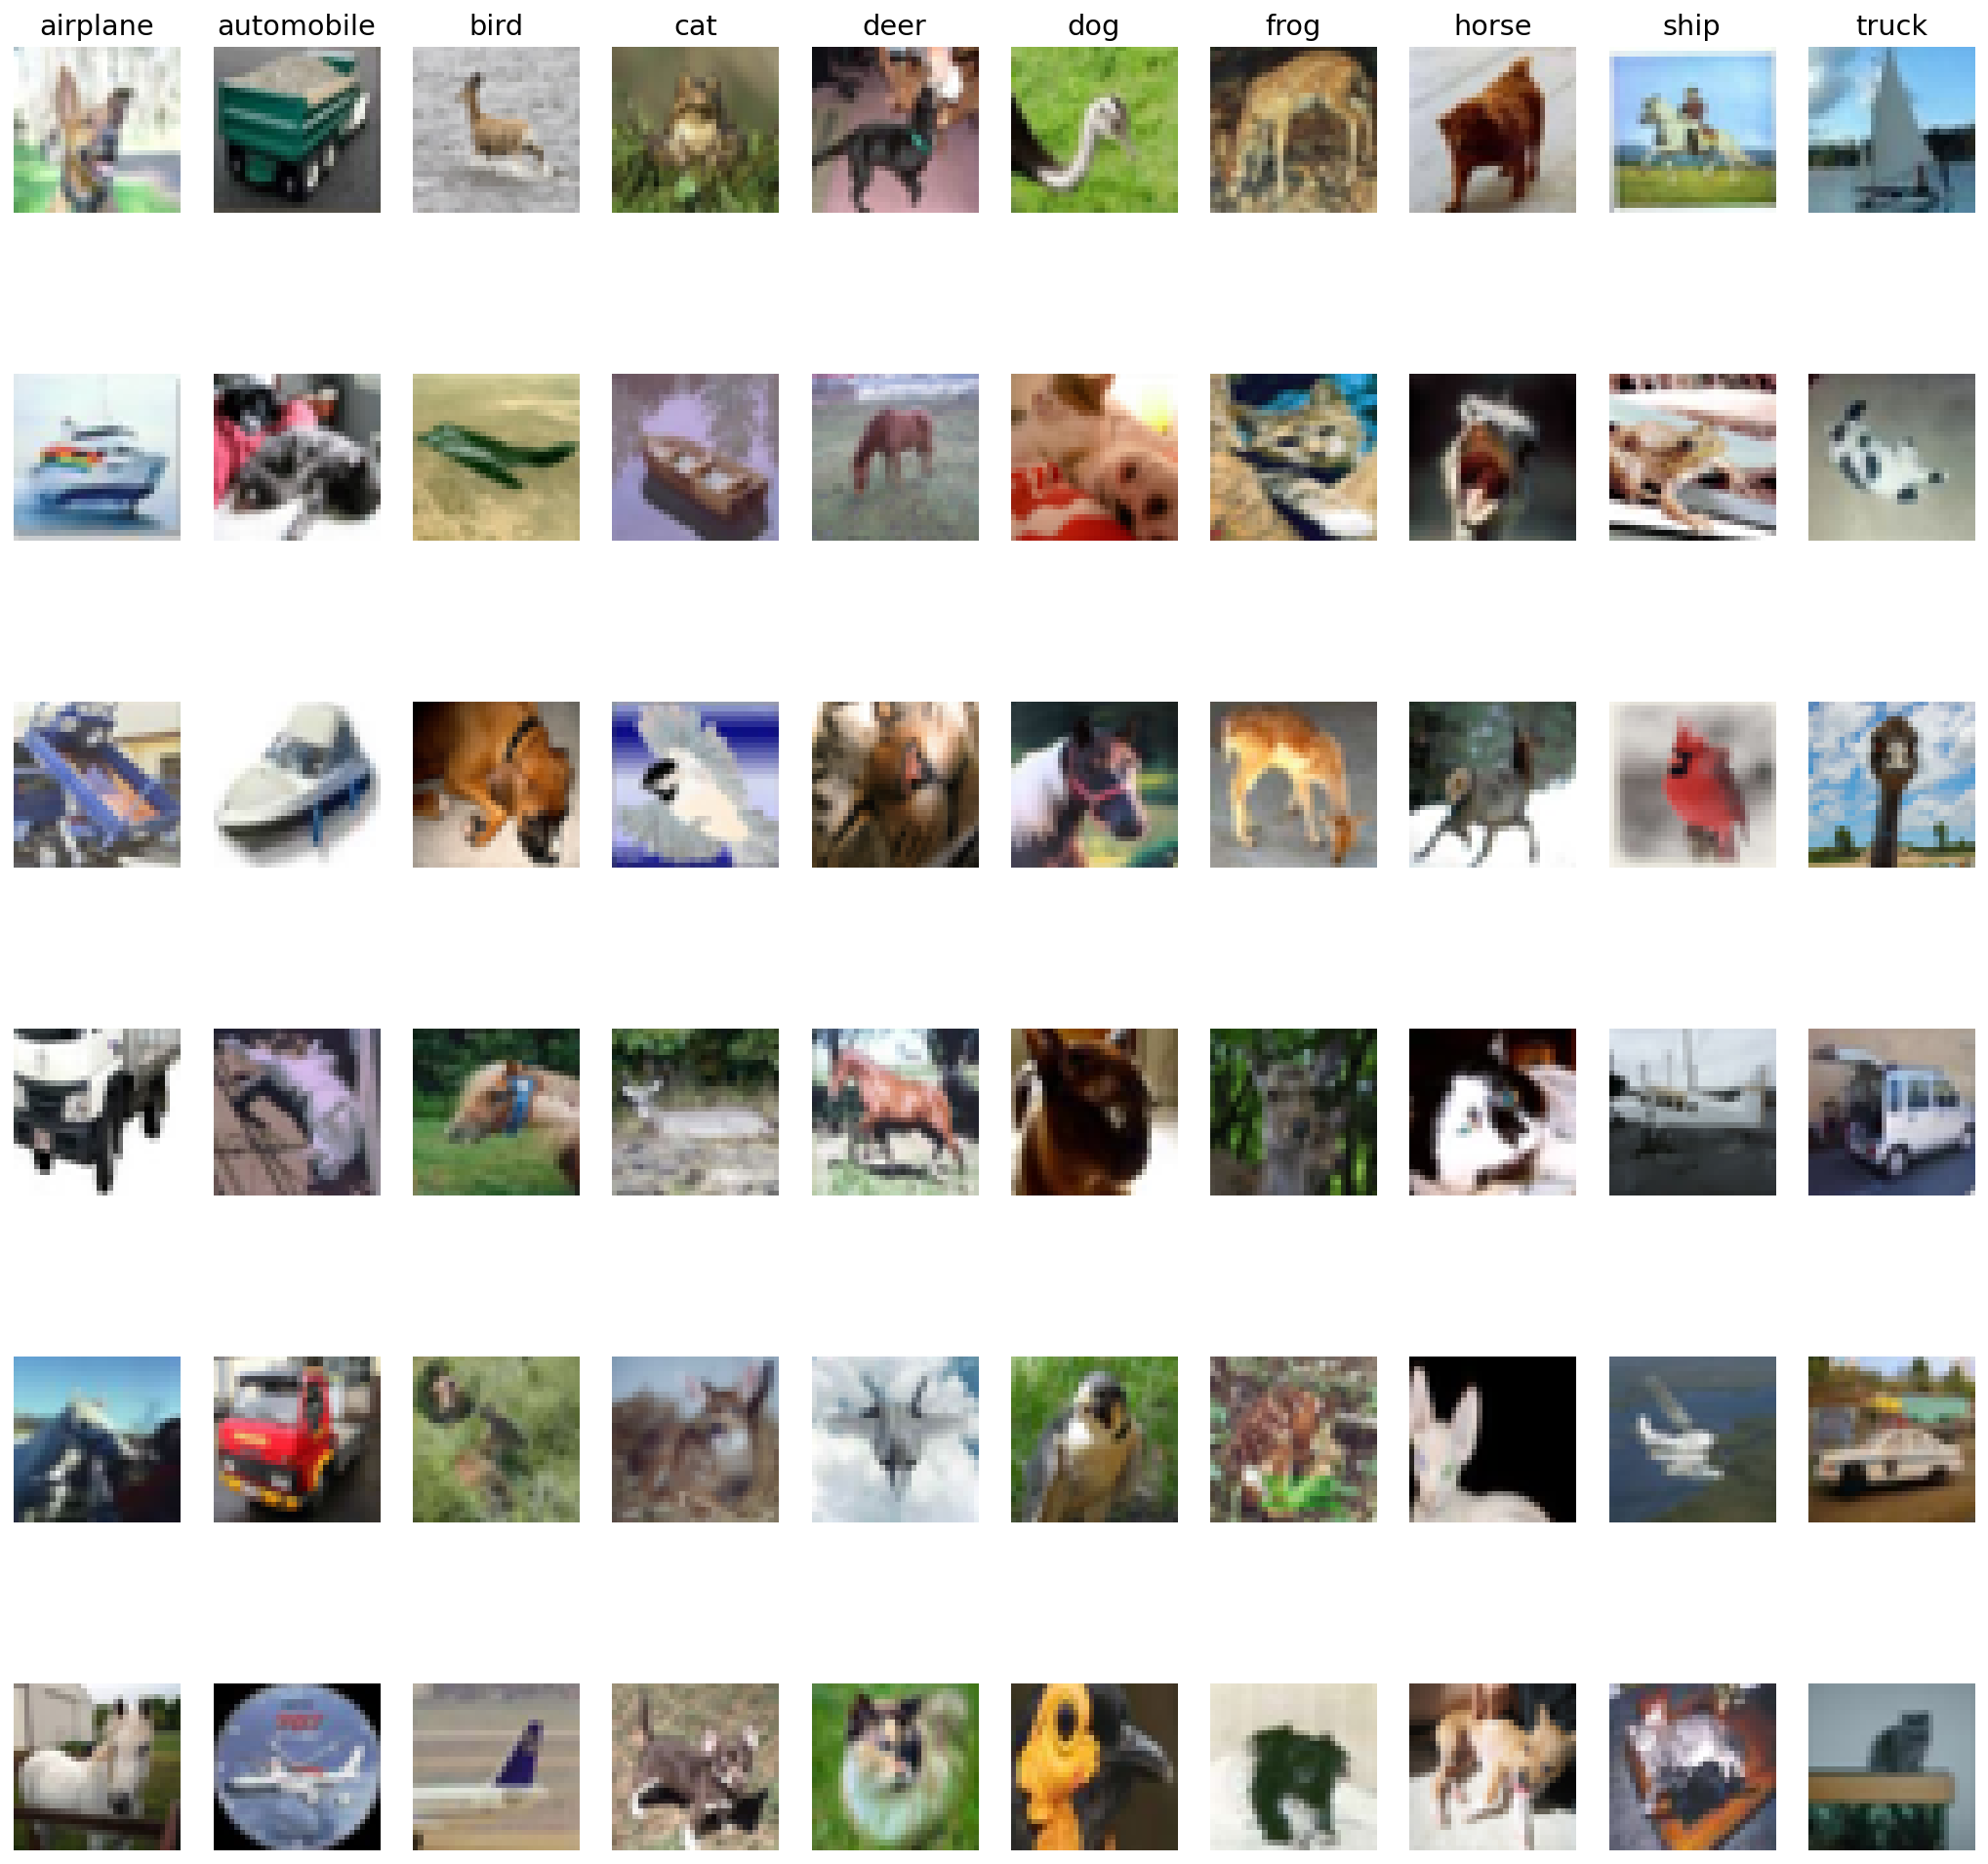

In [50]:
examples_per_class = 6
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(18,18))
for cls, cls_name in enumerate(class_names):
  idxs = np.where(cls == err_y)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, len(class_names), i * len(class_names) + cls + 1)
    plt.imshow(err_x[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name)
plt.show()

